In [26]:
import pandas as pd
from ydata_profiling import ProfileReport
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score

# 1. Import you data and perform basic data exploration phase.

In [2]:
df = pd.read_csv("African_crises_dataset.csv")
df

,country_number,country_code,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,70,ZWE,Zimbabwe,2009,1,354.800000,1,1,0.0,-7.670000,1,1,0,crisis
1055,70,ZWE,Zimbabwe,2010,0,378.200000,1,1,0.0,3.217000,1,0,0,no_crisis
1056,70,ZWE,Zimbabwe,2011,0,361.900000,1,1,0.0,4.920000,1,0,0,no_crisis
1057,70,ZWE,Zimbabwe,2012,0,361.900000,1,1,0.0,3.720000,1,0,0,no_crisis


### (a) Display general information about the dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_number                   1059 non-null   int64  
 1   country_code                     1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

### (b) Create a pandas profiling reports to gain insights into the dataset.

In [4]:
profile = ProfileReport(df, title="Data Profile Report")

profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### (c) Handle Missing and corrupted values.
    - There are no missing or corrupted values to handle.

### (d) Remove duplicates, if they exist.
    - There are no duplicates present in the dataset.

### (e) Handle outliers, if they exist.
    - There are no outliers present in the Dataset.

### (f) Encode categorical features.

In [5]:
#Retrieving and Saving all categorical data into a variable
categories = df.select_dtypes(include="object").columns

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Select the column to encode
for col in categories:
    print(f"Encodiing {col}")
    df[col] = label_encoder.fit_transform(df[col])

Encodiing country_code
Encodiing country
Encodiing banking_crisis


# 2. Select your target variable and the features.

In [9]:
# Correct the feature and label definition
features = df.drop("banking_crisis", axis=1)
label = df["banking_crisis"]  # Use single brackets for the target column

# 3. Split your dataset to training and test sets.

In [10]:
x_train, x_test, y_train, y_test = train_test_split(features, label, train_size = 0.8)

print(f"The size of the Training set is {x_train.shape}")
print(f"The size of the Testing set is {x_test.shape}")

The size of the Training set is (847, 13)
The size of the Testing set is (212, 13)


# 4. Training the models.

### - Decision Tree Model.

In [11]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [12]:
model_prediction = dt.predict(x_test)
model_prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### - ExtraTreesClassifier model.

In [14]:
# Initialize the classifier
etc = ExtraTreesClassifier(n_estimators=100)

# Train the classifier
etc.fit(x_train, y_train)

ExtraTreesClassifier()

In [17]:
etc_pred = etc.predict(x_test)
etc_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### GradientBoostingClassifier Model.

In [19]:
# Initialize the classifier 
gdc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3) 

# Train the classifier 
gdc.fit(x_train, y_train)

GradientBoostingClassifier()

In [20]:
gdc_pred = gdc.predict(x_test)
gdc_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# 5. Assess your model performance on the test set using relevant evaluation metrics.

### Gradient Boosting Classifier.

Gradient Boosting Classifier Accuracy: 0.9905660377358491
Gradient Boosting Classifier Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
           1       0.99      0.99      0.99       195

    accuracy                           0.99       212
   macro avg       0.97      0.97      0.97       212
weighted avg       0.99      0.99      0.99       212



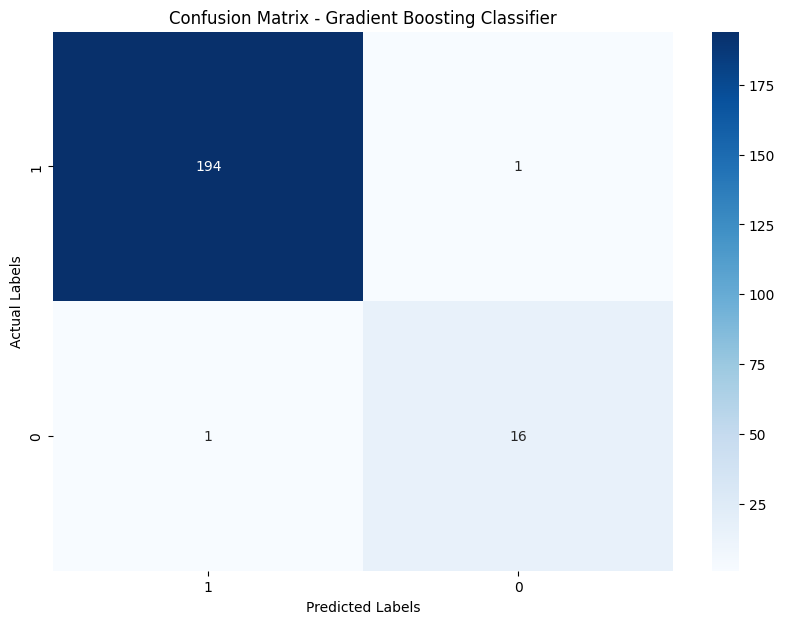

In [30]:
# Accuracy Score
accuracy_gbc = accuracy_score(y_test, gdc_pred)
print(f'Gradient Boosting Classifier Accuracy: {accuracy_gbc}')

# Classification Report
report_gbc = classification_report(y_test, gdc_pred)
print(f'Gradient Boosting Classifier Report:\n{report_gbc}')

# Confusion Matrix
# Create the confusion matrix 
confusion_gbc = pd.crosstab(y_test, gdc_pred, rownames=["Actual Labels"], colnames=["Predicted Labels"]) 
confusion_gbc = confusion_gbc.reindex(index=[1, 0], columns=[1, 0]) 

# Set the Matplotlib backend to inline (for Jupyter Notebook) 
%matplotlib inline

# Plot the heatmap 
plt.figure(figsize=(10, 7)) 
sns.heatmap(confusion_gbc, annot=True, fmt="d", cmap="Blues") 
plt.title("Confusion Matrix - Gradient Boosting Classifier") 
plt.show()

### Interpretation:
The high precision, recall, and F1-scores for both classes indicate that the model performs exceptionally well in distinguishing between the two classes. The weighted averages are also very high, reflecting the model's strong performance across the entire dataset. The slightly lower metrics for class 0 (0.94 for precision, recall, and F1-score) could be due to the smaller number of instances (17) compared to class 1 (195). However, overall, the model shows excellent performance.

### Decision Tree Classifier.

Decision Tree Classifier Accuracy: 0.9952830188679245
Decision Tree Classifier Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.99      1.00      1.00       195

    accuracy                           1.00       212
   macro avg       1.00      0.97      0.98       212
weighted avg       1.00      1.00      1.00       212



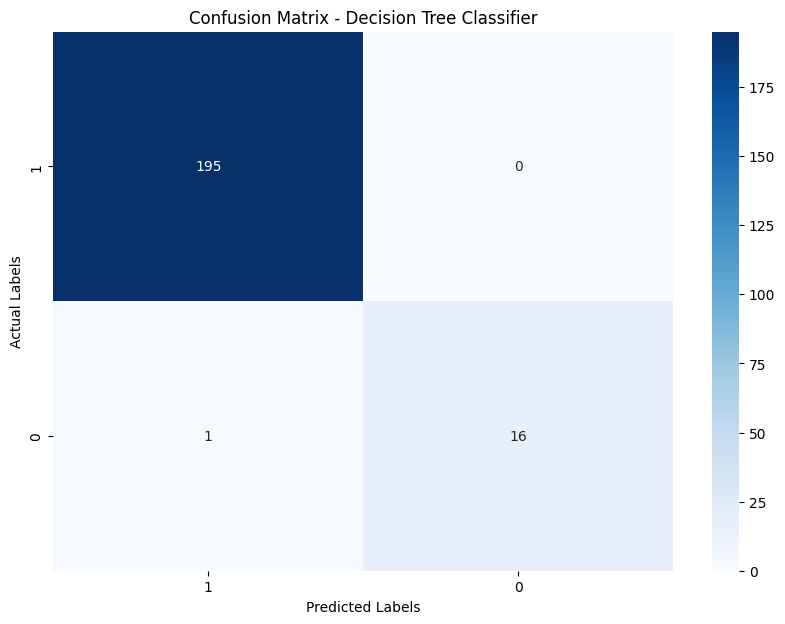

In [33]:
# Accuracy Score
accuracy_dt = accuracy_score(y_test, model_prediction)
print(f'Decision Tree Classifier Accuracy: {accuracy_dt}')

# Classification Report
report_dt = classification_report(y_test, model_prediction)
print(f'Decision Tree Classifier Report:\n{report_dt}')

# Confusion Matrix
# Create the confusion matrix 
confusion_dt = pd.crosstab(y_test, model_prediction, rownames=["Actual Labels"], colnames=["Predicted Labels"]) 
confusion_dt = confusion_dt.reindex(index=[1, 0], columns=[1, 0]) 

# Set the Matplotlib backend to inline (for Jupyter Notebook) 
%matplotlib inline

# Plot the heatmap 
plt.figure(figsize=(10, 7)) 
sns.heatmap(confusion_dt, annot=True, fmt="d", cmap="Blues") 
plt.title("Confusion Matrix - Decision Tree Classifier") 
plt.show()

### Interpretation:
The high precision, recall, and F1-scores for both classes indicate that the Decision Tree Classifier performs exceptionally well in distinguishing between the two classes. The perfect precision for class 0 and the perfect recall for class 1 suggest that the model is highly accurate in predicting both classes.

Precision for Class 0: The model correctly predicted all instances labeled as class 0.

Recall for Class 0: The model captured 94% of the actual instances of class 0.

Precision for Class 1: The model correctly predicted 99% of instances labeled as class 1.

Recall for Class 1: The model captured all actual instances of class 1.

### Extra Trees Classifier.

Extra Trees Classifier Accuracy: 0.9952830188679245
Extra Trees Classifier Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.99      1.00      1.00       195

    accuracy                           1.00       212
   macro avg       1.00      0.97      0.98       212
weighted avg       1.00      1.00      1.00       212



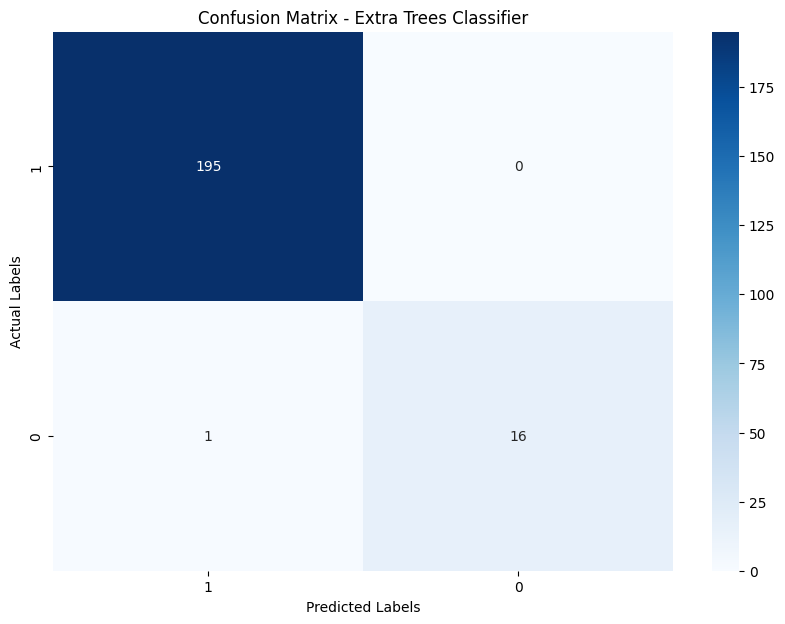

In [34]:
# Accuracy Score
accuracy_etc = accuracy_score(y_test, etc_pred)
print(f'Extra Trees Classifier Accuracy: {accuracy_etc}')

# Classification Report
report_etc = classification_report(y_test, etc_pred)
print(f'Extra Trees Classifier Report:\n{report_etc}')

# Confusion Matrix
# Create the confusion matrix 
confusion_etc = pd.crosstab(y_test, etc_pred, rownames=["Actual Labels"], colnames=["Predicted Labels"]) 
confusion_etc = confusion_etc.reindex(index=[1, 0], columns=[1, 0]) 

# Set the Matplotlib backend to inline (for Jupyter Notebook) 
%matplotlib inline

# Plot the heatmap 
plt.figure(figsize=(10, 7)) 
sns.heatmap(confusion_etc, annot=True, fmt="d", cmap="Blues") 
plt.title("Confusion Matrix - Extra Trees Classifier") 
plt.show()

### Interpretation
The high precision, recall, and F1-scores for both classes indicate that the Extra Trees Classifier performs exceptionally well in distinguishing between the two classes. The perfect precision for class 0 and the perfect recall for class 1 suggest that the model is highly accurate in predicting both classes.

Precision for Class 0: The model correctly predicted all instances labeled as class 0.

Recall for Class 0: The model captured 94% of the actual instances of class 0.

Precision for Class 1: The model correctly predicted 99% of instances labeled as class 1.

Recall for Class 1: The model captured all actual instances of class 1.